In [155]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

tf.__version__


'2.10.0'

In [156]:
(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [157]:
train_data[10].shape

(28, 28)

In [158]:
train_labels[11]

5

In [159]:
train_data = train_data /255
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data /255
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)


In [160]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [161]:
def one_hot_label(image, label):
    label = tf.one_hot(label, depth=10)
    return image, label

In [162]:
batch_size = 64
max_epochs = 12

N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size = batch_size)
print(train_dataset)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size = batch_size)
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


label = 9


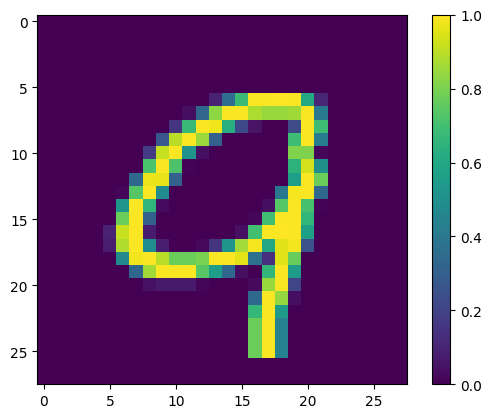

In [163]:
index = 3000
print("label = {}".format( train_labels[index]))
plt.imshow(train_data[index])
plt.colorbar()
plt.show()

In [164]:
model = keras.Sequential([

    keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),

    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3),padding='same',  activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3),padding='same',  activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3),padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])

In [165]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              #모델 아웃풋이 logiist인 상태 자체적으로 로짓과 액티베이션을 분리해서 다양한 액티베이션으로 분석함

              metrics=['accuracy'])

In [166]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.09666905 0.09555471 0.10000537 0.1057732  0.10479762 0.10026614
  0.10200787 0.09472878 0.09890652 0.10129076]]


In [167]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 64)         

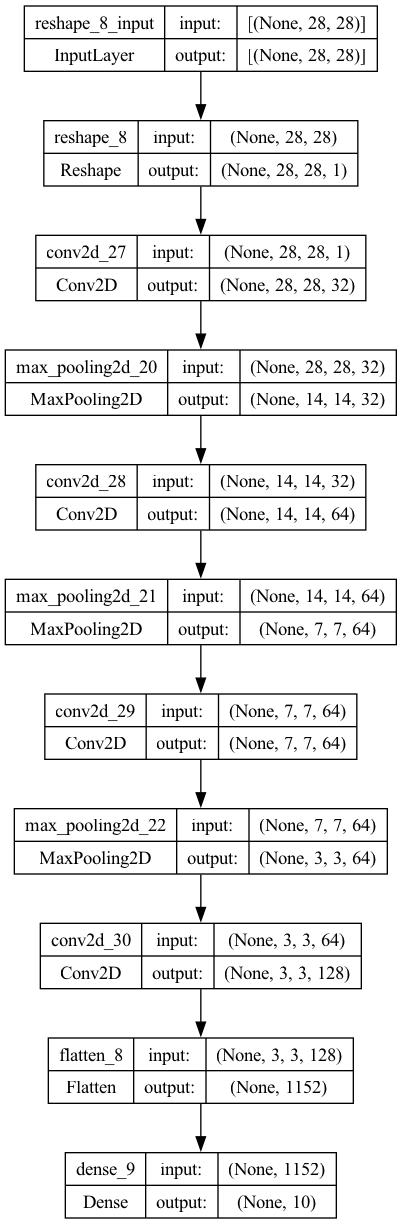

In [168]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [169]:
history = model.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size)

Epoch 1/12


/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/keras/backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-12-23 19:20:50.449546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


937/937 [==============================] - 19s 20ms/step - loss: 0.4657 - accuracy: 0.8746
Epoch 2/12
937/937 [==============================] - 19s 20ms/step - loss: 0.1078 - accuracy: 0.9678
Epoch 3/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0774 - accuracy: 0.9765
Epoch 4/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0617 - accuracy: 0.9813
Epoch 5/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0521 - accuracy: 0.9846
Epoch 6/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0451 - accuracy: 0.9861
Epoch 7/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0394 - accuracy: 0.9879
Epoch 8/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 9/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 10/12
937/937 [==============================] - 19s 20ms/step - loss: 0.0279 - accurac

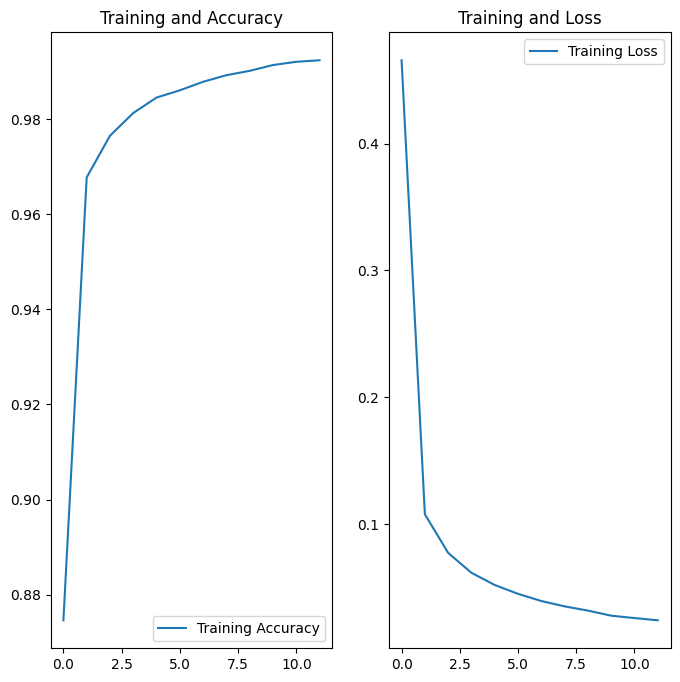

In [170]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Loss')
plt.show()

In [171]:
results = model.evaluate(test_dataset, steps=int(len(test_data) / batch_size))

  6/156 [>.............................] - ETA: 1s - loss: 0.0148 - accuracy: 0.9948 

2023-12-23 19:24:37.488766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


156/156 [==============================] - 2s 11ms/step - loss: 0.0280 - accuracy: 0.9909


In [172]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 0.028
accuracy value: 99.0885%
